# Sales Data Analysis

The dataset you will be using is a CSV file called sales_data.csv. It contains information about sales made by a fictional company over the course of a year. The columns in the dataset are as follows:


##### 🧨 date: The date of the sale (in YYYY-MM-DD format)

##### 🧨 product: The name of the product sold

##### 🧨 category: The category of the product (e.g. "electronics", "clothing", etc.)

##### 🧨 price: The price of the product (in USD)

##### 🧨 quantity: The quantity of the product sold

##### 🧨 revenue: The total revenue generated by the sale (i.e. price * quantity)

# Questions to Answer

##### 1️⃣ What was the total revenue generated by the company over the course of the year?
##### 2️⃣ Which product had the highest revenue? How much revenue did it generate?
##### 3️⃣ What was the average price of a product sold by the company?
##### 4️⃣ What was the total quantity of products sold by the company?
##### 5️⃣ Which category had the highest revenue? How much revenue did it generate?
##### 6️⃣ What was the average revenue per sale?
##### 7️⃣ What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

<br>

## Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

## Reading Data

In [2]:
df = pd.read_csv(r"sales_data.csv")

In [3]:
# Show the five rows of the data frame
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


## Understanding the data

In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [5]:
# Shape of the data
shape = df.shape
print("Number of rows: %i " %shape[0], "| Number of columns %i " %shape[1], sep="")

Number of rows: 369 | Number of columns 6 


In [6]:
# Number of missing values 
print("Number of missing values = %s " %df.isnull().sum().sum())

Number of missing values = 4 


In [7]:
# Summary information
df.describe(include="all")

,date,product,category,price,quantity,revenue
count,369,369,369,367.000000,368.000000,368.000000
unique,365,14,8,NaN,NaN,NaN
top,2022-01-01,Smartphone,Electronics,NaN,NaN,NaN
freq,2,82,130,NaN,NaN,NaN
mean,NaN,NaN,NaN,211.226158,14.565217,2060.679348
std,NaN,NaN,NaN,227.335170,8.595740,1910.930790
min,NaN,NaN,NaN,20.000000,3.000000,300.000000
25%,NaN,NaN,NaN,50.000000,8.000000,800.000000
50%,NaN,NaN,NaN,100.000000,12.000000,1200.000000
75%,NaN,NaN,NaN,300.000000,20.000000,2400.000000


## Data Transformation

In [8]:
# Converting the data to date format
df.date = pd.to_datetime(df.date)

In [9]:
df.date

0     2022-01-01
1     2022-01-01
2     2022-01-02
3     2022-01-03
4     2022-01-04
         ...    
364   2022-12-27
365   2022-12-28
366   2022-12-29
367   2022-12-30
368   2022-12-31
Name: date, Length: 369, dtype: datetime64[ns]

In [10]:
# Check the formats od the data
df.dtypes

date        datetime64[ns]
product             object
category            object
price              float64
quantity           float64
revenue            float64
dtype: object

## Data Exploratory

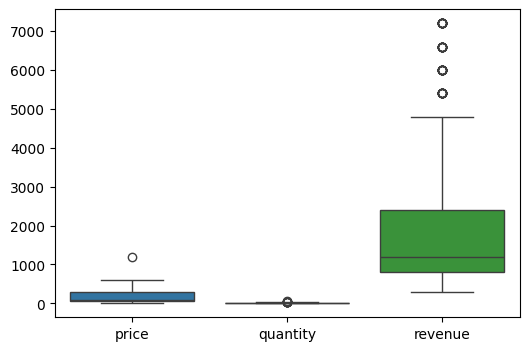

In [11]:
# Box Plot helps us to detect there are outliers
plt.figure(figsize=(6, 4))
sea.boxplot(df)
plt.show()

<Axes: ylabel='Count'>

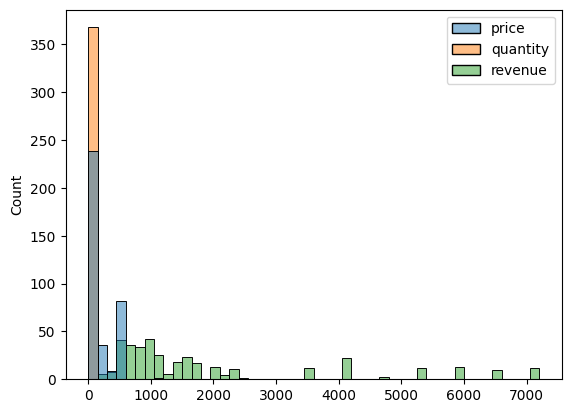

In [12]:
# Show the distribution
sea.histplot(df)

## Data Cleaning

In [13]:
# remove the missing values
df.dropna(inplace=True)

In [14]:
# Check the missings
df.isna().sum().sum()

0

In [15]:
# Build a function to handle the outliers
def handle_outliers(data=df):
    for col in data.columns:
        if data[col].dtypes != "object" and data[col].dtypes != "datetime64[ns]":
            Q1 = np.percentile(data[col], 25)
            Q3 = np.percentile(data[col], 75)
            IQR = Q3 - Q1
            a = Q1 - 1.5 * IQR
            b = Q3 + 1.5 * IQR
            data[col] = np.where(data[col] > b, b, data[col])
            data[col] = np.where(data[col] < a, a, data[col])

    return data

# handle the outliers
ndf = handle_outliers()
ndf

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,425.0,10.0,4800.0
1,2022-01-01,Laptop,Electronics,425.0,5.0,4800.0
2,2022-01-02,T-Shirt,Clothing,20.0,38.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,425.0,11.0,4800.0


<Axes: >

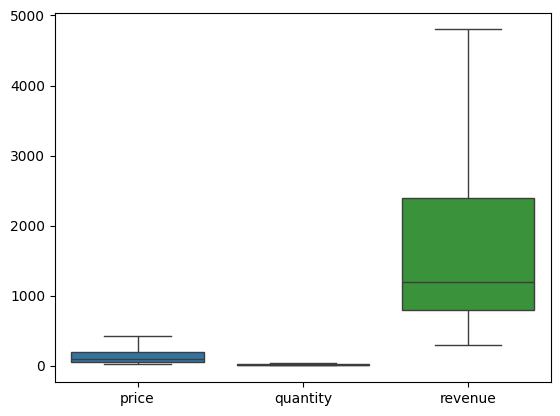

In [16]:
# Check outliers using the box plot
sea.boxplot(ndf)

<br>

# Answer the Questions

In [17]:
# 1️⃣ What was the total revenue generated by the company over the course of the year?
ndf['revenue'].sum()

680630.0

In [18]:
# 2️⃣ Which product had the highest revenue? How much revenue did it generate?
product_revenue = ndf.groupby(["product"])['revenue'].sum()

In [19]:
product_revenue.idxmax()

'Smartphone'

In [20]:
# 3️⃣ What was the average price of a product sold by the company?

In [21]:
ndf['price'].mean()

169.23287671232876

In [22]:
product_average = ndf.groupby(["product"])['price'].mean()

In [23]:
sorted_product_average = product_average.sort_values()

In [24]:
sorted_product_average

product
T-Shirt        20.0
Wallet         30.0
Hoodie         40.0
Backpack       50.0
Jeans          50.0
Sneakers       80.0
Speaker        80.0
Coat          100.0
Headphones    100.0
Watch         150.0
Smartwatch    200.0
Tablet        400.0
Laptop        425.0
Smartphone    425.0
Name: price, dtype: float64

In [25]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='product', ylabel='price'>

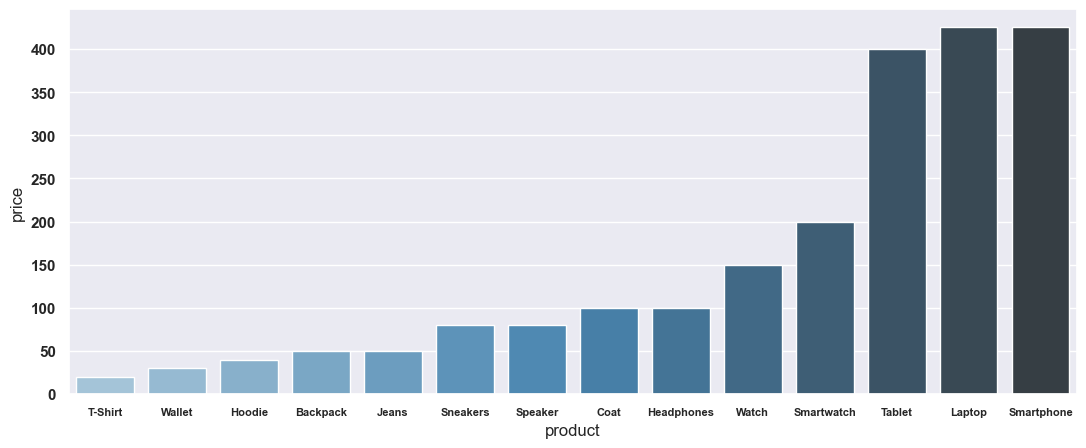

In [26]:
sea.set()
plt.figure(figsize=(13, 5))
plt.xticks(fontsize=8, weight = 'bold')
plt.yticks(weight = 'bold')
sea.barplot(sorted_product_average, palette="Blues_d")

In [27]:
# 4️⃣ What was the total quantity of products sold by the company?
totatl_product_quantity = ndf.groupby(["product"])['quantity'].sum().sum()

In [28]:
totatl_product_quantity

5272.0

In [29]:
# 5️⃣ Which category had the highest revenue? How much revenue did it generate?
highest_category_revenue = ndf.groupby(["category"])['revenue'].sum().idxmax()

In [30]:
highest_category_revenue

'Electronics'

In [31]:
# 6️⃣ What was the average revenue per sale?
ndf['total_revenue'] = ndf['price'] * ndf['quantity']
avg_revenue_per_sale = ndf['total_revenue'].mean()

In [32]:
round(avg_revenue_per_sale, 2)

1696.16

In [33]:
# 7️⃣ What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)
ndf['quarter'] = ndf['date'].dt.quarter
# Group the DataFrame by the quarter column and aggregate the revenue column
quarter_revenue = df.groupby('quarter')['revenue'].sum()

# Print the quarter_revenue DataFrame
print(quarter_revenue)

quarter
1    166500.0
2    162970.0
3    175630.0
4    175530.0
Name: revenue, dtype: float64


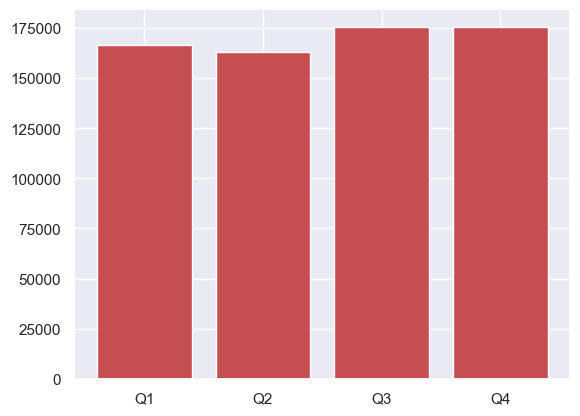

In [34]:
# Seaborn color palette to plot a pie chart
colors = sea.color_palette('bright')
plt.bar(height=quarter_revenue, x=["Q1", "Q2", "Q3", "Q4"], color="r")
plt.show()